In [1]:
import pandas

In [2]:
df_train = pandas.read_csv('C:/Users/davem/Documents/AI Academy/csv/dota2_skill_train.csv', index_col='id')
df_test = pandas.read_csv('C:/Users/davem/Documents/AI Academy/csv/dota2_skill_test.csv', index_col='id')
df_heroes = pandas.read_csv('C:/Users/davem/Documents/AI Academy/csv/dota2_heroes.csv', index_col='hero_id')

In [3]:
df_items = pandas.read_csv('C:/Users/davem/Documents/AI Academy/csv/dota2_items.csv', index_col='item_id')
df_abilities = pandas.read_csv('C:/Users/davem/Documents/AI Academy/csv/dota2_abilities.csv', index_col='ability_id')

In [4]:
df_train['creep_score']=(df_train['last_hits']*60)//df_train['duration']
df_test['creep_score']=(df_test['last_hits']*60)//df_test['duration']

In [176]:
df_train.head()

,skilled,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,...,final_item_231,final_item_205,final_item_206,final_item_207,final_item_208,final_item_210,final_item_214,final_item_215,final_item_254,gold_contribution
id,,,,,,,,,,,,,,,,,,,,,
7,1,dire,dire,2140,90,129,0,90,9,0,...,False,False,False,False,False,False,True,False,False,15
8,0,radiant,radiant,2138,90,174,0,5,5,0,...,False,False,False,False,False,False,True,False,False,13
12,0,radiant,radiant,3547,90,360,0,81,7,0,...,False,False,False,False,False,False,False,False,False,21
13,1,dire,radiant,1878,90,28,0,74,9,0,...,False,False,False,False,False,False,True,False,False,18
14,1,dire,radiant,2232,90,129,0,14,6,0,...,False,False,False,False,False,False,True,False,False,9


In [67]:
df_items.query('item_id==237')

,dname,qual,cost,notes
item_id,,,,
237,Faerie Fire,consumable,70.0,NaN


In [43]:
df_train['team_fight_participation']=0
df_test['team_fight_participation']=0

In [44]:
import json
import tqdm
df_itemlog = pandas.DataFrame()
j = 0

with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_train.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        purchase_log = record['item_purchase_log']
        player
        fight_participation = record['team_fight_participation']
        fight_participation*=100
        fight_participation=int(fight_participation)
        df_train['team_fight_participation'].iat[j]=fight_participation     
        j += 1
        if j == 99871:
            break
j=0
with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_test.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        fight_participation = record['team_fight_participation']
        fight_participation*=100
        fight_participation=int(fight_participation)
        df_test['team_fight_participation'].iat[j]=fight_participation   
        j += 1
        if j == 43265:
            break

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [164]:
df_heroes.query('localized_name=="Necrophos"')

,name,localized_name,roles,agi_gain,attack_range,attack_rate,attack_type,base_agi,base_armor,base_attack_max,...,base_mr,base_str,cm_enabled,int_gain,legs,move_speed,primary_attr,projectile_speed,str_gain,turn_rate
hero_id,,,,,,,,,,,,,,,,,,,,,
36,npc_dota_hero_necrolyte,Necrophos,"['Carry', 'Nuker', 'Durable', 'Disabler']",1.3,500,1.7,Ranged,12,1.0,30,...,25,18,True,2.9,2,280,int,900,2.8,0.5


In [169]:
df_train[['skilled','is_hero_36']].query('is_hero_36==True')

,skilled,is_hero_36
id,,
138,0,True
248,1,True
673,0,True
992,1,True
1300,0,True
2079,0,True
2081,0,True
2242,0,True
2542,1,True


In [149]:
df_train[['skilled','gold_contribution']]

,skilled,gold_contribution
id,,
7,1,15
8,0,13
12,0,21
13,1,18
14,1,9
15,0,23
19,0,19
23,1,26
25,0,18


In [87]:
import json
import tqdm
j = 0

with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_train.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        final_items = record['final_items']
        for item_id in df_items.index.values:
            df_train['final_item_{}'.format(item_id)].iat[j] = item_id in final_items
        j += 1
        if j == 99871:
            break

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [90]:
import json
import tqdm
j = 0

with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_test.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        final_items = record['final_items']
        for item_id in df_items.index.values:
            df_test['final_item_{}'.format(item_id)].iat[j] = item_id in final_items
        j += 1
        if j == 43265:
            break

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [94]:
df_train['gold_contribution']=0
df_test['gold_contribution']=0

In [95]:
import json
import tqdm
j = 0

with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_train.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        series = record['series']
        overall_gold = series['{}_gold'.format(df_train.player_team.iat[j])][-1]
        player_gold = series['player_gold'][-1]
        df_train['gold_contribution'].iat[j]=(player_gold*100)//overall_gold
        j += 1
        if j == 99871:
            break
j = 0

with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_test.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        # обработка record
        series = record['series']
        overall_gold = series['{}_gold'.format(df_test.player_team.iat[j])][-1]
        player_gold = series['player_gold'][-1]
        df_test['gold_contribution'].iat[j]=(player_gold*100)//overall_gold
        j += 1
        if j == 43265:
            break

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [62]:
record

{'ability_upgrades': [5127,
  5128,
  5128,
  5127,
  5126,
  5129,
  5128,
  5126,
  5127,
  5903,
  5127,
  5129,
  5126,
  5126,
  7042,
  5128,
  5129,
  6520],
 'assists': 23,
 'avg_assists_x16': 19,
 'avg_deaths_x16': 9,
 'avg_gpm_x16': 294,
 'avg_kills_x16': 4,
 'avg_xpm_x16': 425,
 'best_assists_x16': 37,
 'best_gpm_x16': 445,
 'best_kills_x16': 13,
 'best_win_streak': 12,
 'best_xpm_x16': 717,
 'camps_stacked': 2,
 'creeps_stacked': 8,
 'damage_targets': {'npc_dota_badguys_fort': 134,
  'npc_dota_badguys_melee_rax_bot': 47,
  'npc_dota_badguys_range_rax_top': 57,
  'npc_dota_badguys_siege': 341,
  'npc_dota_badguys_tower1_bot': 172,
  'npc_dota_badguys_tower2_mid': 409,
  'npc_dota_badguys_tower2_top': 111,
  'npc_dota_badguys_tower3_top': 132,
  'npc_dota_badguys_tower4': 173,
  'npc_dota_creep_badguys_melee': 10397,
  'npc_dota_creep_badguys_ranged': 1971,
  'npc_dota_creep_goodguys_melee': 56,
  'npc_dota_creep_goodguys_melee_upgraded': 102,
  'npc_dota_hero_axe': 8191,
  '

In [7]:
df_train['win']=0
df_test['win']=0
df_train['kda']=0
df_test['kda']=0

In [8]:
df_train['avg_kda']=0
df_test['avg_kda']=0

In [9]:
for i in range (0,99871):
    if df_train['deaths'].iloc[i]!=0:
        df_train['kda'].iat[i]=((df_train['kills'].iat[i])+df_train['assists'].iat[i])//df_train['deaths'].iat[i]
    else:
        df_train['kda'].iat[i]=((df_train['kills'].iat[i])+df_train['assists'].iat[i])
df_train['kda']=df_train['kda'].astype('int64')
for i in range (0,43265):
    if df_test['deaths'].iloc[i]!=0:
        df_test['kda'].iat[i]=((df_test['kills'].iat[i])+df_test['assists'].iat[i])//df_test['deaths'].iat[i]
    else:
        df_test['kda'].iat[i]=((df_test['kills'].iat[i])+df_test['assists'].iat[i])
df_test['kda']=df_test['kda'].astype('int64')

In [10]:
for i in range (0,99871):
    if df_train['avg_deaths_x16'].iloc[i]!=0:
        df_train['avg_kda'].iat[i]=((df_train['avg_kills_x16'].iat[i])+df_train['avg_assists_x16'].iat[i])//df_train['avg_deaths_x16'].iat[i]
    else:
        df_train['avg_kda'].iat[i]=((df_train['avg_kills_x16'].iat[i])+df_train['avg_assists_x16'].iat[i])
df_train['avg_kda']=df_train['avg_kda'].astype('int64')
for i in range (0,43265):
    if df_test['avg_deaths_x16'].iloc[i]!=0:
        df_test['avg_kda'].iat[i]=((df_test['avg_kills_x16'].iat[i])+df_test['avg_assists_x16'].iat[i])//df_test['avg_deaths_x16'].iat[i]
    else:
        df_test['avg_kda'].iat[i]=((df_test['avg_kills_x16'].iat[i])+df_test['avg_assists_x16'].iat[i])
df_test['avg_kda']=df_test['avg_kda'].astype('int64')

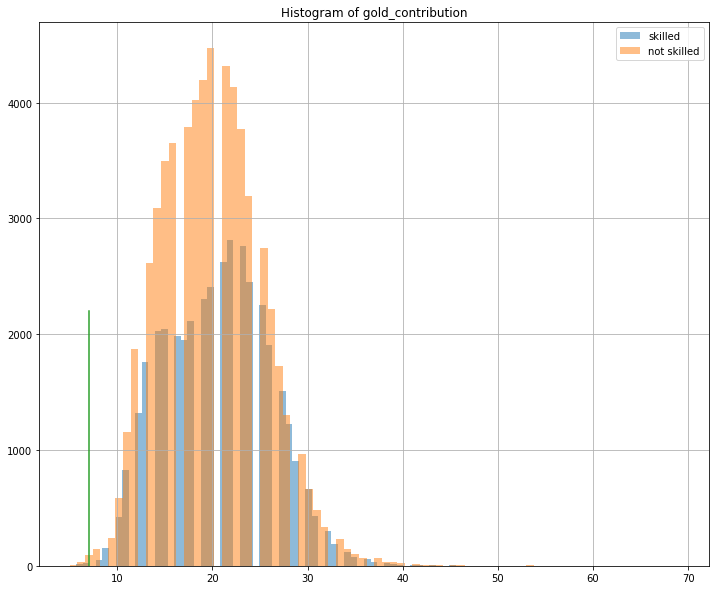

In [178]:
from matplotlib.pyplot import *
selected_column = 'gold_contribution'
threshold = 7

figure(figsize=(12, 10))
df_train.loc[df_train.skilled == 1, selected_column].hist(bins=80, alpha=0.5)
df_train.loc[df_train.skilled == 0, selected_column].hist(bins=80, alpha=0.5)
legend(['skilled', 'not skilled'])
plot([threshold, threshold], [0, 2200])
_ = title('Histogram of {}'.format(selected_column))

In [14]:
import json
df_abilities.behavior = df_abilities.behavior.apply(
    lambda x: x.split("'")).apply(lambda x: x[1] if len(x) > 1 else 'empty')
df_abilities.head()
import tqdm

for ability_behavior in set(df_abilities.behavior.fillna('empty')):
    df_train['upgrade_behavior {}'.format(ability_behavior)] = 0
    df_test['upgrade_behavior {}'.format(ability_behavior)] = 0
    
with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_train.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        for ability_upgrade in record['ability_upgrades']:
            df_train.loc[record['id'], 'upgrade_behavior {}'.format(
                df_abilities.loc[ability_upgrade, 'behavior'])] += 1
            
with open('C:/Users/davem/Documents/AI Academy/json/dota2_skill_test.jsonlines') as fin:
    for line in tqdm.tqdm_notebook(fin):
        record = json.loads(line)
        for ability_upgrade in record['ability_upgrades']:
            df_test.loc[record['id'], 'upgrade_behavior {}'.format(
                df_abilities.loc[ability_upgrade, 'behavior'])] += 1

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [ ]:
df_abilities.to_csv(path_or_buf='C:/Users/davem/Documents/AI Academy/df_abilities.csv')

In [15]:
for i in range (0,99871):
    if df_train['winner_team'].iloc[i]==df_train['player_team'].iloc[i]:
       df_train['win'].iat[i]=1
for i in range (0,43265):
    if df_test['winner_team'].iloc[i]==df_test['player_team'].iloc[i]:
       df_test['win'].iat[i]=1

In [177]:
list(df_train)

['skilled',
 'player_team',
 'winner_team',
 'duration',
 'pre_game_duration',
 'first_blood_time',
 'first_blood_claimed',
 'hero_id',
 'hero_pick_order',
 'leaver_status',
 'party_players',
 'kills',
 'deaths',
 'assists',
 'denies',
 'level',
 'net_worth',
 'gold',
 'gold_spent',
 'last_hits',
 'gold_per_min',
 'xp_per_min',
 'hero_damage',
 'tower_damage',
 'hero_healing',
 'scaled_hero_damage',
 'scaled_tower_damage',
 'scaled_hero_healing',
 'stuns',
 'team_fight_participation',
 'observer_wards_placed',
 'sentry_wards_placed',
 'creeps_stacked',
 'camps_stacked',
 'rune_pickups',
 'tower_kills',
 'roshan_kills',
 'nearby_creep_death_count',
 'radiant_tower_status',
 'dire_tower_status',
 'radiant_barracks_status',
 'dire_barracks_status',
 'fight_score',
 'farm_score',
 'support_score',
 'push_score',
 'avg_kills_x16',
 'avg_deaths_x16',
 'avg_assists_x16',
 'avg_gpm_x16',
 'avg_xpm_x16',
 'best_kills_x16',
 'best_assists_x16',
 'best_gpm_x16',
 'best_xpm_x16',
 'win_streak',
 '

In [138]:
X = df_train.drop(columns=['winner_team','player_team','skilled'])
X_test = df_test.drop(columns=['winner_team','player_team']) 
y = df_train['skilled']

In [173]:
for hero_id in set(df_train.hero_id):
    df_train['is_hero_{}'.format(hero_id)] = df_train.hero_id == hero_id
    df_test['is_hero_{}'.format(hero_id)] = df_test.hero_id == hero_id

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
y_pred_rf = cross_val_predict(
    RandomForestClassifier(n_estimators=200),
    X, y,
    cv=5,
    n_jobs=-1,
    method='predict_proba'
)[:, 1]

y_pred_gb = cross_val_predict(
    GradientBoostingClassifier(),
    X, y,
    cv=5,
    n_jobs=-1,
    method='predict_proba'
)[:, 1]

y_pred = 0.5 * y_pred_rf + 0.5 * y_pred_gb

print('Validation accuracy RF:', accuracy_score(df_train['skilled'], y_pred_rf > 0.5))
print('Validation accuracy GB:', accuracy_score(df_train['skilled'], y_pred_gb > 0.5))
print('Validation accuracy RF+GB:', accuracy_score(df_train['skilled'], y_pred > 0.5))

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf.fit(X, y)
y_pred_rf = model_rf.predict(X_test)

model_gb = GradientBoostingClassifier()
model_gb.fit(X, y)
y_pred_gb = model_gb.predict_proba(X_test)[:, 1]
y_pred = ((0.5 * y_pred_rf + 0.5 * y_pred_gb) > 0.5).astype(int)

In [ ]:
import calendar;
import time;
ts = calendar.timegm(time.gmtime())
df_submission_tree = pandas.DataFrame({'skilled': y_pred_rf}, index=df_test.index)
df_submission_tree.to_csv('C:/Users/davem/Documents/AI Academy/submissions/submission_{}.csv'.format(ts))
df_submission_tree

In [139]:
from catboost import CatBoostClassifier
cat_features=[0,1]
model = CatBoostClassifier(iterations=4000,learning_rate=0.1,random_state=120)

In [140]:
model.fit(X, y, cat_features)
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
preds_raw = model.predict(X_test, prediction_type='RawFormulaVal')
preds_class=preds_class.astype('int64')

0:	learn: 0.6767409	total: 256ms	remaining: 17m 2s
1:	learn: 0.6636271	total: 489ms	remaining: 16m 17s
2:	learn: 0.6526710	total: 699ms	remaining: 15m 31s
3:	learn: 0.6437054	total: 924ms	remaining: 15m 23s
4:	learn: 0.6361175	total: 1.15s	remaining: 15m 20s
5:	learn: 0.6296732	total: 1.37s	remaining: 15m 14s
6:	learn: 0.6244443	total: 1.6s	remaining: 15m 11s
7:	learn: 0.6196452	total: 1.83s	remaining: 15m 12s
8:	learn: 0.6150106	total: 2.05s	remaining: 15m 11s
9:	learn: 0.6110191	total: 2.29s	remaining: 15m 14s
10:	learn: 0.6075981	total: 2.51s	remaining: 15m 9s
11:	learn: 0.6043905	total: 2.73s	remaining: 15m 6s
12:	learn: 0.6015183	total: 2.92s	remaining: 14m 56s
13:	learn: 0.5989705	total: 3.12s	remaining: 14m 49s
14:	learn: 0.5965143	total: 3.32s	remaining: 14m 42s
15:	learn: 0.5941882	total: 3.52s	remaining: 14m 37s
16:	learn: 0.5918413	total: 3.74s	remaining: 14m 36s
17:	learn: 0.5900446	total: 3.94s	remaining: 14m 31s
18:	learn: 0.5880569	total: 4.16s	remaining: 14m 31s
19:	lea

155:	learn: 0.5022666	total: 36.5s	remaining: 14m 59s
156:	learn: 0.5020709	total: 36.8s	remaining: 15m
157:	learn: 0.5017867	total: 37.1s	remaining: 15m 2s
158:	learn: 0.5015174	total: 37.4s	remaining: 15m 3s
159:	learn: 0.5012108	total: 37.6s	remaining: 15m 2s
160:	learn: 0.5010456	total: 37.9s	remaining: 15m 3s
161:	learn: 0.5007542	total: 38.1s	remaining: 15m 3s
162:	learn: 0.5005500	total: 38.3s	remaining: 15m 2s
163:	learn: 0.5002206	total: 38.6s	remaining: 15m 2s
164:	learn: 0.5000007	total: 38.8s	remaining: 15m 2s
165:	learn: 0.4997927	total: 39s	remaining: 15m 1s
166:	learn: 0.4995515	total: 39.3s	remaining: 15m 2s
167:	learn: 0.4991344	total: 39.6s	remaining: 15m 2s
168:	learn: 0.4988767	total: 39.8s	remaining: 15m 2s
169:	learn: 0.4986069	total: 40s	remaining: 15m 1s
170:	learn: 0.4983058	total: 40.3s	remaining: 15m 1s
171:	learn: 0.4980510	total: 40.5s	remaining: 15m 2s
172:	learn: 0.4977738	total: 40.9s	remaining: 15m 4s
173:	learn: 0.4974532	total: 41.2s	remaining: 15m 5s

309:	learn: 0.4685947	total: 1m 15s	remaining: 14m 56s
310:	learn: 0.4684632	total: 1m 15s	remaining: 14m 55s
311:	learn: 0.4683063	total: 1m 15s	remaining: 14m 56s
312:	learn: 0.4681509	total: 1m 16s	remaining: 14m 56s
313:	learn: 0.4679722	total: 1m 16s	remaining: 14m 56s
314:	learn: 0.4678416	total: 1m 16s	remaining: 14m 57s
315:	learn: 0.4676523	total: 1m 16s	remaining: 14m 56s
316:	learn: 0.4674989	total: 1m 17s	remaining: 14m 56s
317:	learn: 0.4673274	total: 1m 17s	remaining: 14m 56s
318:	learn: 0.4672006	total: 1m 17s	remaining: 14m 56s
319:	learn: 0.4670191	total: 1m 17s	remaining: 14m 56s
320:	learn: 0.4668948	total: 1m 18s	remaining: 14m 56s
321:	learn: 0.4667440	total: 1m 18s	remaining: 14m 55s
322:	learn: 0.4665542	total: 1m 18s	remaining: 14m 55s
323:	learn: 0.4664354	total: 1m 18s	remaining: 14m 55s
324:	learn: 0.4662517	total: 1m 19s	remaining: 14m 55s
325:	learn: 0.4660170	total: 1m 19s	remaining: 14m 55s
326:	learn: 0.4658721	total: 1m 19s	remaining: 14m 55s
327:	learn

458:	learn: 0.4469625	total: 1m 52s	remaining: 14m 26s
459:	learn: 0.4468493	total: 1m 52s	remaining: 14m 26s
460:	learn: 0.4466819	total: 1m 52s	remaining: 14m 26s
461:	learn: 0.4465657	total: 1m 53s	remaining: 14m 26s
462:	learn: 0.4464669	total: 1m 53s	remaining: 14m 25s
463:	learn: 0.4463660	total: 1m 53s	remaining: 14m 25s
464:	learn: 0.4462653	total: 1m 53s	remaining: 14m 25s
465:	learn: 0.4461181	total: 1m 54s	remaining: 14m 25s
466:	learn: 0.4459919	total: 1m 54s	remaining: 14m 25s
467:	learn: 0.4458297	total: 1m 54s	remaining: 14m 25s
468:	learn: 0.4457203	total: 1m 55s	remaining: 14m 26s
469:	learn: 0.4456154	total: 1m 55s	remaining: 14m 26s
470:	learn: 0.4454376	total: 1m 55s	remaining: 14m 26s
471:	learn: 0.4453478	total: 1m 55s	remaining: 14m 26s
472:	learn: 0.4452358	total: 1m 56s	remaining: 14m 26s
473:	learn: 0.4450982	total: 1m 56s	remaining: 14m 25s
474:	learn: 0.4450113	total: 1m 56s	remaining: 14m 25s
475:	learn: 0.4448721	total: 1m 56s	remaining: 14m 25s
476:	learn

610:	learn: 0.4298029	total: 2m 30s	remaining: 13m 54s
611:	learn: 0.4296767	total: 2m 30s	remaining: 13m 54s
612:	learn: 0.4295642	total: 2m 30s	remaining: 13m 53s
613:	learn: 0.4294910	total: 2m 31s	remaining: 13m 53s
614:	learn: 0.4293989	total: 2m 31s	remaining: 13m 53s
615:	learn: 0.4292303	total: 2m 31s	remaining: 13m 53s
616:	learn: 0.4291059	total: 2m 31s	remaining: 13m 53s
617:	learn: 0.4289962	total: 2m 32s	remaining: 13m 52s
618:	learn: 0.4289304	total: 2m 32s	remaining: 13m 52s
619:	learn: 0.4288326	total: 2m 32s	remaining: 13m 52s
620:	learn: 0.4287614	total: 2m 32s	remaining: 13m 52s
621:	learn: 0.4286608	total: 2m 33s	remaining: 13m 51s
622:	learn: 0.4286122	total: 2m 33s	remaining: 13m 51s
623:	learn: 0.4285152	total: 2m 33s	remaining: 13m 51s
624:	learn: 0.4283896	total: 2m 33s	remaining: 13m 51s
625:	learn: 0.4282935	total: 2m 34s	remaining: 13m 50s
626:	learn: 0.4281862	total: 2m 34s	remaining: 13m 50s
627:	learn: 0.4281054	total: 2m 34s	remaining: 13m 50s
628:	learn

760:	learn: 0.4153801	total: 3m 7s	remaining: 13m 16s
761:	learn: 0.4153083	total: 3m 7s	remaining: 13m 16s
762:	learn: 0.4152154	total: 3m 7s	remaining: 13m 16s
763:	learn: 0.4151190	total: 3m 7s	remaining: 13m 15s
764:	learn: 0.4150492	total: 3m 8s	remaining: 13m 15s
765:	learn: 0.4149576	total: 3m 8s	remaining: 13m 15s
766:	learn: 0.4148729	total: 3m 8s	remaining: 13m 15s
767:	learn: 0.4148038	total: 3m 9s	remaining: 13m 15s
768:	learn: 0.4146540	total: 3m 9s	remaining: 13m 15s
769:	learn: 0.4145879	total: 3m 9s	remaining: 13m 15s
770:	learn: 0.4145193	total: 3m 9s	remaining: 13m 15s
771:	learn: 0.4144336	total: 3m 10s	remaining: 13m 15s
772:	learn: 0.4143370	total: 3m 10s	remaining: 13m 14s
773:	learn: 0.4142665	total: 3m 10s	remaining: 13m 14s
774:	learn: 0.4142008	total: 3m 10s	remaining: 13m 14s
775:	learn: 0.4140968	total: 3m 11s	remaining: 13m 14s
776:	learn: 0.4139901	total: 3m 11s	remaining: 13m 14s
777:	learn: 0.4139015	total: 3m 11s	remaining: 13m 14s
778:	learn: 0.4137782

911:	learn: 0.4030109	total: 3m 45s	remaining: 12m 45s
912:	learn: 0.4029323	total: 3m 46s	remaining: 12m 44s
913:	learn: 0.4028678	total: 3m 46s	remaining: 12m 44s
914:	learn: 0.4027623	total: 3m 46s	remaining: 12m 44s
915:	learn: 0.4026935	total: 3m 46s	remaining: 12m 44s
916:	learn: 0.4026477	total: 3m 47s	remaining: 12m 44s
917:	learn: 0.4025462	total: 3m 47s	remaining: 12m 43s
918:	learn: 0.4024840	total: 3m 47s	remaining: 12m 43s
919:	learn: 0.4024163	total: 3m 48s	remaining: 12m 43s
920:	learn: 0.4023596	total: 3m 48s	remaining: 12m 43s
921:	learn: 0.4022856	total: 3m 48s	remaining: 12m 43s
922:	learn: 0.4022189	total: 3m 48s	remaining: 12m 42s
923:	learn: 0.4021452	total: 3m 49s	remaining: 12m 42s
924:	learn: 0.4020536	total: 3m 49s	remaining: 12m 42s
925:	learn: 0.4019857	total: 3m 49s	remaining: 12m 42s
926:	learn: 0.4018968	total: 3m 49s	remaining: 12m 42s
927:	learn: 0.4018373	total: 3m 50s	remaining: 12m 41s
928:	learn: 0.4017826	total: 3m 50s	remaining: 12m 41s
929:	learn

1061:	learn: 0.3922825	total: 4m 22s	remaining: 12m 6s
1062:	learn: 0.3922328	total: 4m 22s	remaining: 12m 6s
1063:	learn: 0.3921628	total: 4m 23s	remaining: 12m 6s
1064:	learn: 0.3920760	total: 4m 23s	remaining: 12m 5s
1065:	learn: 0.3920249	total: 4m 23s	remaining: 12m 5s
1066:	learn: 0.3919438	total: 4m 23s	remaining: 12m 5s
1067:	learn: 0.3918635	total: 4m 24s	remaining: 12m 4s
1068:	learn: 0.3917943	total: 4m 24s	remaining: 12m 4s
1069:	learn: 0.3917492	total: 4m 24s	remaining: 12m 4s
1070:	learn: 0.3916914	total: 4m 24s	remaining: 12m 4s
1071:	learn: 0.3916106	total: 4m 25s	remaining: 12m 3s
1072:	learn: 0.3915626	total: 4m 25s	remaining: 12m 3s
1073:	learn: 0.3914988	total: 4m 25s	remaining: 12m 3s
1074:	learn: 0.3914102	total: 4m 25s	remaining: 12m 3s
1075:	learn: 0.3913086	total: 4m 25s	remaining: 12m 2s
1076:	learn: 0.3912479	total: 4m 26s	remaining: 12m 2s
1077:	learn: 0.3911568	total: 4m 26s	remaining: 12m 2s
1078:	learn: 0.3910900	total: 4m 26s	remaining: 12m 1s
1079:	lear

1209:	learn: 0.3822410	total: 4m 59s	remaining: 11m 30s
1210:	learn: 0.3821922	total: 4m 59s	remaining: 11m 30s
1211:	learn: 0.3821307	total: 5m	remaining: 11m 30s
1212:	learn: 0.3821006	total: 5m	remaining: 11m 30s
1213:	learn: 0.3820713	total: 5m	remaining: 11m 30s
1214:	learn: 0.3820247	total: 5m 1s	remaining: 11m 30s
1215:	learn: 0.3819330	total: 5m 1s	remaining: 11m 29s
1216:	learn: 0.3818652	total: 5m 1s	remaining: 11m 29s
1217:	learn: 0.3817974	total: 5m 1s	remaining: 11m 29s
1218:	learn: 0.3817633	total: 5m 2s	remaining: 11m 29s
1219:	learn: 0.3816908	total: 5m 2s	remaining: 11m 29s
1220:	learn: 0.3816267	total: 5m 2s	remaining: 11m 28s
1221:	learn: 0.3815537	total: 5m 2s	remaining: 11m 28s
1222:	learn: 0.3815043	total: 5m 3s	remaining: 11m 28s
1223:	learn: 0.3812640	total: 5m 3s	remaining: 11m 28s
1224:	learn: 0.3811967	total: 5m 3s	remaining: 11m 28s
1225:	learn: 0.3811300	total: 5m 4s	remaining: 11m 27s
1226:	learn: 0.3810426	total: 5m 4s	remaining: 11m 27s
1227:	learn: 0.38

1358:	learn: 0.3731869	total: 5m 36s	remaining: 10m 54s
1359:	learn: 0.3731286	total: 5m 37s	remaining: 10m 54s
1360:	learn: 0.3730717	total: 5m 37s	remaining: 10m 54s
1361:	learn: 0.3730152	total: 5m 37s	remaining: 10m 54s
1362:	learn: 0.3729741	total: 5m 37s	remaining: 10m 53s
1363:	learn: 0.3728695	total: 5m 38s	remaining: 10m 53s
1364:	learn: 0.3727902	total: 5m 38s	remaining: 10m 53s
1365:	learn: 0.3727465	total: 5m 38s	remaining: 10m 53s
1366:	learn: 0.3726817	total: 5m 38s	remaining: 10m 52s
1367:	learn: 0.3726158	total: 5m 39s	remaining: 10m 52s
1368:	learn: 0.3725563	total: 5m 39s	remaining: 10m 52s
1369:	learn: 0.3724994	total: 5m 39s	remaining: 10m 52s
1370:	learn: 0.3724162	total: 5m 40s	remaining: 10m 52s
1371:	learn: 0.3723508	total: 5m 40s	remaining: 10m 51s
1372:	learn: 0.3723072	total: 5m 40s	remaining: 10m 51s
1373:	learn: 0.3722400	total: 5m 40s	remaining: 10m 51s
1374:	learn: 0.3722005	total: 5m 41s	remaining: 10m 51s
1375:	learn: 0.3721475	total: 5m 41s	remaining: 

1506:	learn: 0.3647407	total: 6m 15s	remaining: 10m 20s
1507:	learn: 0.3646881	total: 6m 15s	remaining: 10m 20s
1508:	learn: 0.3646298	total: 6m 15s	remaining: 10m 20s
1509:	learn: 0.3645800	total: 6m 15s	remaining: 10m 19s
1510:	learn: 0.3645106	total: 6m 16s	remaining: 10m 19s
1511:	learn: 0.3644559	total: 6m 16s	remaining: 10m 19s
1512:	learn: 0.3644106	total: 6m 16s	remaining: 10m 19s
1513:	learn: 0.3643225	total: 6m 17s	remaining: 10m 19s
1514:	learn: 0.3642685	total: 6m 17s	remaining: 10m 18s
1515:	learn: 0.3642357	total: 6m 17s	remaining: 10m 18s
1516:	learn: 0.3642142	total: 6m 17s	remaining: 10m 18s
1517:	learn: 0.3641654	total: 6m 18s	remaining: 10m 18s
1518:	learn: 0.3641241	total: 6m 18s	remaining: 10m 17s
1519:	learn: 0.3640720	total: 6m 18s	remaining: 10m 17s
1520:	learn: 0.3639982	total: 6m 18s	remaining: 10m 17s
1521:	learn: 0.3639306	total: 6m 19s	remaining: 10m 17s
1522:	learn: 0.3638769	total: 6m 19s	remaining: 10m 17s
1523:	learn: 0.3638120	total: 6m 19s	remaining: 

1655:	learn: 0.3565720	total: 6m 58s	remaining: 9m 51s
1656:	learn: 0.3565114	total: 6m 58s	remaining: 9m 51s
1657:	learn: 0.3564568	total: 6m 58s	remaining: 9m 51s
1658:	learn: 0.3563864	total: 6m 58s	remaining: 9m 51s
1659:	learn: 0.3563552	total: 6m 59s	remaining: 9m 50s
1660:	learn: 0.3562752	total: 6m 59s	remaining: 9m 50s
1661:	learn: 0.3562273	total: 6m 59s	remaining: 9m 50s
1662:	learn: 0.3561522	total: 6m 59s	remaining: 9m 50s
1663:	learn: 0.3560874	total: 7m	remaining: 9m 49s
1664:	learn: 0.3560311	total: 7m	remaining: 9m 49s
1665:	learn: 0.3559763	total: 7m	remaining: 9m 49s
1666:	learn: 0.3558971	total: 7m	remaining: 9m 49s
1667:	learn: 0.3558588	total: 7m 1s	remaining: 9m 48s
1668:	learn: 0.3558115	total: 7m 1s	remaining: 9m 48s
1669:	learn: 0.3557636	total: 7m 1s	remaining: 9m 48s
1670:	learn: 0.3557093	total: 7m 1s	remaining: 9m 47s
1671:	learn: 0.3556618	total: 7m 2s	remaining: 9m 47s
1672:	learn: 0.3556115	total: 7m 2s	remaining: 9m 47s
1673:	learn: 0.3555771	total: 7m

1805:	learn: 0.3485501	total: 7m 37s	remaining: 9m 15s
1806:	learn: 0.3485041	total: 7m 37s	remaining: 9m 15s
1807:	learn: 0.3484531	total: 7m 37s	remaining: 9m 15s
1808:	learn: 0.3484105	total: 7m 38s	remaining: 9m 15s
1809:	learn: 0.3483569	total: 7m 38s	remaining: 9m 14s
1810:	learn: 0.3483075	total: 7m 38s	remaining: 9m 14s
1811:	learn: 0.3482600	total: 7m 38s	remaining: 9m 14s
1812:	learn: 0.3482179	total: 7m 39s	remaining: 9m 13s
1813:	learn: 0.3481814	total: 7m 39s	remaining: 9m 13s
1814:	learn: 0.3481265	total: 7m 39s	remaining: 9m 13s
1815:	learn: 0.3480837	total: 7m 40s	remaining: 9m 13s
1816:	learn: 0.3480386	total: 7m 40s	remaining: 9m 13s
1817:	learn: 0.3479619	total: 7m 40s	remaining: 9m 12s
1818:	learn: 0.3479195	total: 7m 41s	remaining: 9m 12s
1819:	learn: 0.3478950	total: 7m 41s	remaining: 9m 12s
1820:	learn: 0.3478422	total: 7m 41s	remaining: 9m 12s
1821:	learn: 0.3477922	total: 7m 41s	remaining: 9m 12s
1822:	learn: 0.3477614	total: 7m 42s	remaining: 9m 12s
1823:	lear

1956:	learn: 0.3412849	total: 8m 17s	remaining: 8m 39s
1957:	learn: 0.3412334	total: 8m 17s	remaining: 8m 38s
1958:	learn: 0.3411577	total: 8m 17s	remaining: 8m 38s
1959:	learn: 0.3411203	total: 8m 17s	remaining: 8m 38s
1960:	learn: 0.3410905	total: 8m 18s	remaining: 8m 37s
1961:	learn: 0.3410608	total: 8m 18s	remaining: 8m 37s
1962:	learn: 0.3410011	total: 8m 18s	remaining: 8m 37s
1963:	learn: 0.3409357	total: 8m 18s	remaining: 8m 37s
1964:	learn: 0.3408853	total: 8m 19s	remaining: 8m 36s
1965:	learn: 0.3408350	total: 8m 19s	remaining: 8m 36s
1966:	learn: 0.3408082	total: 8m 19s	remaining: 8m 36s
1967:	learn: 0.3407635	total: 8m 19s	remaining: 8m 36s
1968:	learn: 0.3406953	total: 8m 20s	remaining: 8m 35s
1969:	learn: 0.3406216	total: 8m 20s	remaining: 8m 35s
1970:	learn: 0.3405638	total: 8m 20s	remaining: 8m 35s
1971:	learn: 0.3405221	total: 8m 20s	remaining: 8m 35s
1972:	learn: 0.3404686	total: 8m 21s	remaining: 8m 34s
1973:	learn: 0.3404120	total: 8m 21s	remaining: 8m 34s
1974:	lear

2106:	learn: 0.3340178	total: 8m 56s	remaining: 8m 2s
2107:	learn: 0.3339609	total: 8m 56s	remaining: 8m 1s
2108:	learn: 0.3339261	total: 8m 57s	remaining: 8m 1s
2109:	learn: 0.3338789	total: 8m 57s	remaining: 8m 1s
2110:	learn: 0.3338220	total: 8m 57s	remaining: 8m 1s
2111:	learn: 0.3337740	total: 8m 57s	remaining: 8m
2112:	learn: 0.3337285	total: 8m 58s	remaining: 8m
2113:	learn: 0.3335781	total: 8m 58s	remaining: 8m
2114:	learn: 0.3335111	total: 8m 58s	remaining: 8m
2115:	learn: 0.3334520	total: 8m 58s	remaining: 7m 59s
2116:	learn: 0.3334083	total: 8m 59s	remaining: 7m 59s
2117:	learn: 0.3333786	total: 8m 59s	remaining: 7m 59s
2118:	learn: 0.3333358	total: 8m 59s	remaining: 7m 58s
2119:	learn: 0.3332778	total: 8m 59s	remaining: 7m 58s
2120:	learn: 0.3332418	total: 9m	remaining: 7m 58s
2121:	learn: 0.3332006	total: 9m	remaining: 7m 58s
2122:	learn: 0.3331410	total: 9m	remaining: 7m 57s
2123:	learn: 0.3331177	total: 9m	remaining: 7m 57s
2124:	learn: 0.3330677	total: 9m 1s	remaining: 

2257:	learn: 0.3270276	total: 9m 33s	remaining: 7m 22s
2258:	learn: 0.3269730	total: 9m 34s	remaining: 7m 22s
2259:	learn: 0.3269433	total: 9m 34s	remaining: 7m 22s
2260:	learn: 0.3268835	total: 9m 34s	remaining: 7m 21s
2261:	learn: 0.3268426	total: 9m 34s	remaining: 7m 21s
2262:	learn: 0.3268025	total: 9m 35s	remaining: 7m 21s
2263:	learn: 0.3267784	total: 9m 35s	remaining: 7m 21s
2264:	learn: 0.3267262	total: 9m 35s	remaining: 7m 20s
2265:	learn: 0.3266820	total: 9m 35s	remaining: 7m 20s
2266:	learn: 0.3266371	total: 9m 35s	remaining: 7m 20s
2267:	learn: 0.3265547	total: 9m 36s	remaining: 7m 20s
2268:	learn: 0.3264963	total: 9m 36s	remaining: 7m 19s
2269:	learn: 0.3264639	total: 9m 36s	remaining: 7m 19s
2270:	learn: 0.3264180	total: 9m 36s	remaining: 7m 19s
2271:	learn: 0.3263625	total: 9m 37s	remaining: 7m 18s
2272:	learn: 0.3262902	total: 9m 37s	remaining: 7m 18s
2273:	learn: 0.3262350	total: 9m 37s	remaining: 7m 18s
2274:	learn: 0.3261772	total: 9m 37s	remaining: 7m 18s
2275:	lear

2408:	learn: 0.3203583	total: 10m 11s	remaining: 6m 43s
2409:	learn: 0.3203396	total: 10m 11s	remaining: 6m 43s
2410:	learn: 0.3203037	total: 10m 11s	remaining: 6m 43s
2411:	learn: 0.3202650	total: 10m 11s	remaining: 6m 42s
2412:	learn: 0.3202067	total: 10m 12s	remaining: 6m 42s
2413:	learn: 0.3201701	total: 10m 12s	remaining: 6m 42s
2414:	learn: 0.3201243	total: 10m 12s	remaining: 6m 42s
2415:	learn: 0.3200919	total: 10m 12s	remaining: 6m 41s
2416:	learn: 0.3200666	total: 10m 13s	remaining: 6m 41s
2417:	learn: 0.3200301	total: 10m 13s	remaining: 6m 41s
2418:	learn: 0.3199784	total: 10m 13s	remaining: 6m 40s
2419:	learn: 0.3199414	total: 10m 13s	remaining: 6m 40s
2420:	learn: 0.3198813	total: 10m 13s	remaining: 6m 40s
2421:	learn: 0.3198391	total: 10m 14s	remaining: 6m 40s
2422:	learn: 0.3198140	total: 10m 14s	remaining: 6m 39s
2423:	learn: 0.3197756	total: 10m 14s	remaining: 6m 39s
2424:	learn: 0.3197370	total: 10m 14s	remaining: 6m 39s
2425:	learn: 0.3196902	total: 10m 15s	remaining:

2555:	learn: 0.3137367	total: 10m 49s	remaining: 6m 7s
2556:	learn: 0.3137048	total: 10m 49s	remaining: 6m 6s
2557:	learn: 0.3136583	total: 10m 50s	remaining: 6m 6s
2558:	learn: 0.3136355	total: 10m 50s	remaining: 6m 6s
2559:	learn: 0.3136038	total: 10m 50s	remaining: 6m 6s
2560:	learn: 0.3135736	total: 10m 50s	remaining: 6m 5s
2561:	learn: 0.3135530	total: 10m 51s	remaining: 6m 5s
2562:	learn: 0.3134829	total: 10m 51s	remaining: 6m 5s
2563:	learn: 0.3134296	total: 10m 51s	remaining: 6m 4s
2564:	learn: 0.3133758	total: 10m 51s	remaining: 6m 4s
2565:	learn: 0.3133288	total: 10m 52s	remaining: 6m 4s
2566:	learn: 0.3132781	total: 10m 52s	remaining: 6m 4s
2567:	learn: 0.3132519	total: 10m 52s	remaining: 6m 4s
2568:	learn: 0.3132174	total: 10m 53s	remaining: 6m 3s
2569:	learn: 0.3131818	total: 10m 53s	remaining: 6m 3s
2570:	learn: 0.3131493	total: 10m 53s	remaining: 6m 3s
2571:	learn: 0.3131156	total: 10m 53s	remaining: 6m 3s
2572:	learn: 0.3130697	total: 10m 54s	remaining: 6m 2s
2573:	lear

2703:	learn: 0.3077107	total: 11m 28s	remaining: 5m 29s
2704:	learn: 0.3076804	total: 11m 28s	remaining: 5m 29s
2705:	learn: 0.3076432	total: 11m 28s	remaining: 5m 29s
2706:	learn: 0.3076056	total: 11m 28s	remaining: 5m 29s
2707:	learn: 0.3075664	total: 11m 29s	remaining: 5m 28s
2708:	learn: 0.3075029	total: 11m 29s	remaining: 5m 28s
2709:	learn: 0.3074527	total: 11m 29s	remaining: 5m 28s
2710:	learn: 0.3074151	total: 11m 30s	remaining: 5m 28s
2711:	learn: 0.3073885	total: 11m 30s	remaining: 5m 27s
2712:	learn: 0.3073575	total: 11m 30s	remaining: 5m 27s
2713:	learn: 0.3073291	total: 11m 31s	remaining: 5m 27s
2714:	learn: 0.3073099	total: 11m 31s	remaining: 5m 27s
2715:	learn: 0.3072687	total: 11m 31s	remaining: 5m 26s
2716:	learn: 0.3072269	total: 11m 31s	remaining: 5m 26s
2717:	learn: 0.3071751	total: 11m 32s	remaining: 5m 26s
2718:	learn: 0.3071333	total: 11m 32s	remaining: 5m 26s
2719:	learn: 0.3070853	total: 11m 32s	remaining: 5m 25s
2720:	learn: 0.3070439	total: 11m 32s	remaining:

2851:	learn: 0.3014269	total: 12m 6s	remaining: 4m 52s
2852:	learn: 0.3013873	total: 12m 7s	remaining: 4m 52s
2853:	learn: 0.3013534	total: 12m 7s	remaining: 4m 52s
2854:	learn: 0.3013164	total: 12m 7s	remaining: 4m 51s
2855:	learn: 0.3012713	total: 12m 8s	remaining: 4m 51s
2856:	learn: 0.3012532	total: 12m 8s	remaining: 4m 51s
2857:	learn: 0.3012331	total: 12m 8s	remaining: 4m 51s
2858:	learn: 0.3011981	total: 12m 9s	remaining: 4m 50s
2859:	learn: 0.3011766	total: 12m 9s	remaining: 4m 50s
2860:	learn: 0.3011403	total: 12m 9s	remaining: 4m 50s
2861:	learn: 0.3011015	total: 12m 9s	remaining: 4m 50s
2862:	learn: 0.3010715	total: 12m 9s	remaining: 4m 49s
2863:	learn: 0.3010286	total: 12m 10s	remaining: 4m 49s
2864:	learn: 0.3009946	total: 12m 10s	remaining: 4m 49s
2865:	learn: 0.3009345	total: 12m 10s	remaining: 4m 49s
2866:	learn: 0.3009079	total: 12m 11s	remaining: 4m 48s
2867:	learn: 0.3008749	total: 12m 11s	remaining: 4m 48s
2868:	learn: 0.3008420	total: 12m 11s	remaining: 4m 48s
2869

2998:	learn: 0.2959240	total: 12m 45s	remaining: 4m 15s
2999:	learn: 0.2959002	total: 12m 45s	remaining: 4m 15s
3000:	learn: 0.2958770	total: 12m 45s	remaining: 4m 14s
3001:	learn: 0.2958486	total: 12m 46s	remaining: 4m 14s
3002:	learn: 0.2958018	total: 12m 46s	remaining: 4m 14s
3003:	learn: 0.2957664	total: 12m 46s	remaining: 4m 14s
3004:	learn: 0.2957507	total: 12m 46s	remaining: 4m 13s
3005:	learn: 0.2956919	total: 12m 47s	remaining: 4m 13s
3006:	learn: 0.2956720	total: 12m 47s	remaining: 4m 13s
3007:	learn: 0.2956245	total: 12m 47s	remaining: 4m 13s
3008:	learn: 0.2956060	total: 12m 47s	remaining: 4m 12s
3009:	learn: 0.2955702	total: 12m 47s	remaining: 4m 12s
3010:	learn: 0.2955475	total: 12m 48s	remaining: 4m 12s
3011:	learn: 0.2955176	total: 12m 48s	remaining: 4m 12s
3012:	learn: 0.2954867	total: 12m 48s	remaining: 4m 11s
3013:	learn: 0.2954222	total: 12m 48s	remaining: 4m 11s
3014:	learn: 0.2953813	total: 12m 49s	remaining: 4m 11s
3015:	learn: 0.2953502	total: 12m 49s	remaining:

3147:	learn: 0.2903079	total: 13m 26s	remaining: 3m 38s
3148:	learn: 0.2902706	total: 13m 27s	remaining: 3m 38s
3149:	learn: 0.2902353	total: 13m 27s	remaining: 3m 37s
3150:	learn: 0.2902050	total: 13m 27s	remaining: 3m 37s
3151:	learn: 0.2901767	total: 13m 27s	remaining: 3m 37s
3152:	learn: 0.2901472	total: 13m 28s	remaining: 3m 37s
3153:	learn: 0.2901205	total: 13m 28s	remaining: 3m 36s
3154:	learn: 0.2900962	total: 13m 28s	remaining: 3m 36s
3155:	learn: 0.2900580	total: 13m 28s	remaining: 3m 36s
3156:	learn: 0.2900129	total: 13m 29s	remaining: 3m 36s
3157:	learn: 0.2899808	total: 13m 29s	remaining: 3m 35s
3158:	learn: 0.2899482	total: 13m 29s	remaining: 3m 35s
3159:	learn: 0.2899093	total: 13m 29s	remaining: 3m 35s
3160:	learn: 0.2898664	total: 13m 30s	remaining: 3m 35s
3161:	learn: 0.2898336	total: 13m 30s	remaining: 3m 34s
3162:	learn: 0.2897848	total: 13m 30s	remaining: 3m 34s
3163:	learn: 0.2897594	total: 13m 30s	remaining: 3m 34s
3164:	learn: 0.2897250	total: 13m 31s	remaining:

3295:	learn: 0.2847025	total: 14m 7s	remaining: 3m 1s
3296:	learn: 0.2846381	total: 14m 7s	remaining: 3m
3297:	learn: 0.2845997	total: 14m 8s	remaining: 3m
3298:	learn: 0.2845502	total: 14m 8s	remaining: 3m
3299:	learn: 0.2845079	total: 14m 8s	remaining: 2m 59s
3300:	learn: 0.2844856	total: 14m 8s	remaining: 2m 59s
3301:	learn: 0.2844457	total: 14m 8s	remaining: 2m 59s
3302:	learn: 0.2844150	total: 14m 9s	remaining: 2m 59s
3303:	learn: 0.2843935	total: 14m 9s	remaining: 2m 58s
3304:	learn: 0.2843389	total: 14m 9s	remaining: 2m 58s
3305:	learn: 0.2843126	total: 14m 9s	remaining: 2m 58s
3306:	learn: 0.2842808	total: 14m 10s	remaining: 2m 58s
3307:	learn: 0.2842551	total: 14m 10s	remaining: 2m 57s
3308:	learn: 0.2842160	total: 14m 10s	remaining: 2m 57s
3309:	learn: 0.2841951	total: 14m 10s	remaining: 2m 57s
3310:	learn: 0.2841484	total: 14m 11s	remaining: 2m 57s
3311:	learn: 0.2841087	total: 14m 11s	remaining: 2m 56s
3312:	learn: 0.2840705	total: 14m 11s	remaining: 2m 56s
3313:	learn: 0.2

3442:	learn: 0.2796124	total: 14m 44s	remaining: 2m 23s
3443:	learn: 0.2795678	total: 14m 44s	remaining: 2m 22s
3444:	learn: 0.2795428	total: 14m 45s	remaining: 2m 22s
3445:	learn: 0.2795329	total: 14m 45s	remaining: 2m 22s
3446:	learn: 0.2794988	total: 14m 45s	remaining: 2m 22s
3447:	learn: 0.2794698	total: 14m 45s	remaining: 2m 21s
3448:	learn: 0.2794510	total: 14m 46s	remaining: 2m 21s
3449:	learn: 0.2794262	total: 14m 46s	remaining: 2m 21s
3450:	learn: 0.2794025	total: 14m 46s	remaining: 2m 21s
3451:	learn: 0.2793595	total: 14m 46s	remaining: 2m 20s
3452:	learn: 0.2793366	total: 14m 47s	remaining: 2m 20s
3453:	learn: 0.2792598	total: 14m 47s	remaining: 2m 20s
3454:	learn: 0.2792323	total: 14m 47s	remaining: 2m 19s
3455:	learn: 0.2791879	total: 14m 47s	remaining: 2m 19s
3456:	learn: 0.2791404	total: 14m 47s	remaining: 2m 19s
3457:	learn: 0.2791211	total: 14m 48s	remaining: 2m 19s
3458:	learn: 0.2790946	total: 14m 48s	remaining: 2m 18s
3459:	learn: 0.2790696	total: 14m 48s	remaining:

3590:	learn: 0.2744170	total: 15m 28s	remaining: 1m 45s
3591:	learn: 0.2743735	total: 15m 28s	remaining: 1m 45s
3592:	learn: 0.2743474	total: 15m 28s	remaining: 1m 45s
3593:	learn: 0.2743198	total: 15m 28s	remaining: 1m 44s
3594:	learn: 0.2742901	total: 15m 28s	remaining: 1m 44s
3595:	learn: 0.2742415	total: 15m 29s	remaining: 1m 44s
3596:	learn: 0.2742119	total: 15m 29s	remaining: 1m 44s
3597:	learn: 0.2741816	total: 15m 29s	remaining: 1m 43s
3598:	learn: 0.2741569	total: 15m 29s	remaining: 1m 43s
3599:	learn: 0.2741267	total: 15m 30s	remaining: 1m 43s
3600:	learn: 0.2741078	total: 15m 30s	remaining: 1m 43s
3601:	learn: 0.2740682	total: 15m 30s	remaining: 1m 42s
3602:	learn: 0.2740226	total: 15m 30s	remaining: 1m 42s
3603:	learn: 0.2740006	total: 15m 31s	remaining: 1m 42s
3604:	learn: 0.2739766	total: 15m 31s	remaining: 1m 42s
3605:	learn: 0.2739527	total: 15m 31s	remaining: 1m 41s
3606:	learn: 0.2739126	total: 15m 31s	remaining: 1m 41s
3607:	learn: 0.2738715	total: 15m 31s	remaining:

3737:	learn: 0.2696296	total: 16m 3s	remaining: 1m 7s
3738:	learn: 0.2695954	total: 16m 4s	remaining: 1m 7s
3739:	learn: 0.2695727	total: 16m 4s	remaining: 1m 7s
3740:	learn: 0.2695232	total: 16m 4s	remaining: 1m 6s
3741:	learn: 0.2694756	total: 16m 4s	remaining: 1m 6s
3742:	learn: 0.2694502	total: 16m 5s	remaining: 1m 6s
3743:	learn: 0.2694205	total: 16m 5s	remaining: 1m 6s
3744:	learn: 0.2693964	total: 16m 5s	remaining: 1m 5s
3745:	learn: 0.2693650	total: 16m 5s	remaining: 1m 5s
3746:	learn: 0.2693349	total: 16m 6s	remaining: 1m 5s
3747:	learn: 0.2692939	total: 16m 6s	remaining: 1m 4s
3748:	learn: 0.2692647	total: 16m 6s	remaining: 1m 4s
3749:	learn: 0.2692265	total: 16m 6s	remaining: 1m 4s
3750:	learn: 0.2691778	total: 16m 7s	remaining: 1m 4s
3751:	learn: 0.2691460	total: 16m 7s	remaining: 1m 3s
3752:	learn: 0.2691179	total: 16m 7s	remaining: 1m 3s
3753:	learn: 0.2690909	total: 16m 7s	remaining: 1m 3s
3754:	learn: 0.2690608	total: 16m 8s	remaining: 1m 3s
3755:	learn: 0.2690433	total

3888:	learn: 0.2647103	total: 16m 40s	remaining: 28.6s
3889:	learn: 0.2646823	total: 16m 40s	remaining: 28.3s
3890:	learn: 0.2646321	total: 16m 41s	remaining: 28s
3891:	learn: 0.2645952	total: 16m 41s	remaining: 27.8s
3892:	learn: 0.2645492	total: 16m 41s	remaining: 27.5s
3893:	learn: 0.2645124	total: 16m 41s	remaining: 27.3s
3894:	learn: 0.2644685	total: 16m 42s	remaining: 27s
3895:	learn: 0.2644274	total: 16m 42s	remaining: 26.8s
3896:	learn: 0.2644066	total: 16m 42s	remaining: 26.5s
3897:	learn: 0.2643633	total: 16m 43s	remaining: 26.2s
3898:	learn: 0.2643217	total: 16m 43s	remaining: 26s
3899:	learn: 0.2642893	total: 16m 43s	remaining: 25.7s
3900:	learn: 0.2642525	total: 16m 43s	remaining: 25.5s
3901:	learn: 0.2642214	total: 16m 43s	remaining: 25.2s
3902:	learn: 0.2641748	total: 16m 44s	remaining: 25s
3903:	learn: 0.2641519	total: 16m 44s	remaining: 24.7s
3904:	learn: 0.2641226	total: 16m 44s	remaining: 24.4s
3905:	learn: 0.2640871	total: 16m 44s	remaining: 24.2s
3906:	learn: 0.264

In [141]:
import calendar;
import time;
ts = calendar.timegm(time.gmtime())
df_submission_tree = pandas.DataFrame({'skilled': preds_class}, index=df_test.index)
df_submission_tree.to_csv('C:/Users/davem/Documents/AI Academy/submissions/submission_{}.csv'.format(ts))
df_submission_tree

,skilled
id,
0,1
1,1
4,0
5,0
9,0
10,0
11,1
17,0
24,0
